# Loan Prediction And Analysis
   By Chirodip Lodh Choudhury
   

# Phase 1

  Data Cleansing And Preparation

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [125]:
loan=pd.read_csv('loan.csv')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [126]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


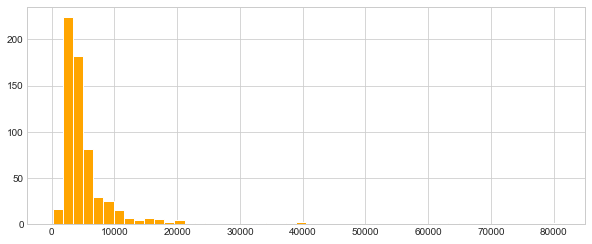

In [127]:
loan['ApplicantIncome'].hist( color='Orange',ec='White',bins=50,figsize=(10,4),stacked=True)

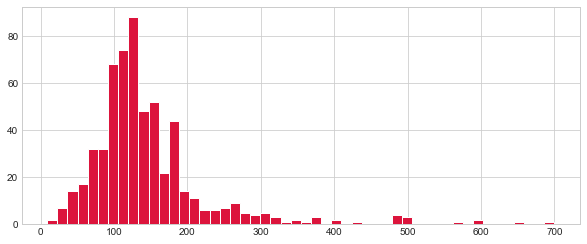

In [128]:
loan['LoanAmount'].hist( color='Crimson',ec='White',bins=50,figsize=(10,4),stacked=True)

Text(0.5, 1.0, 'ApplicantIncome-LoanAmmount plot')

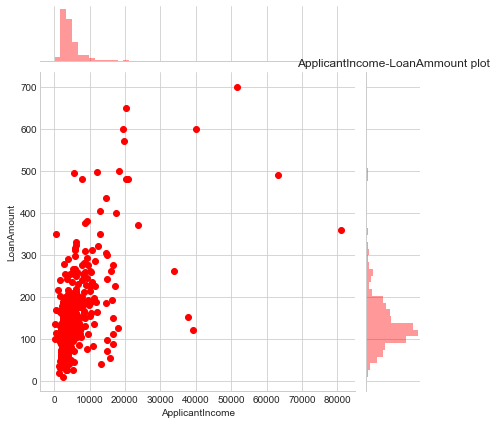

In [129]:
sb.jointplot(loan['ApplicantIncome'],loan['LoanAmount'],kind='scatter',color='R')
plt.style.use('seaborn-whitegrid')
plt.title('ApplicantIncome-LoanAmmount plot')

In [131]:
temp1 = loan['Credit_History'].value_counts(ascending=True)
temp2 = loan.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Approved loan v/s Rejected loan summarization')

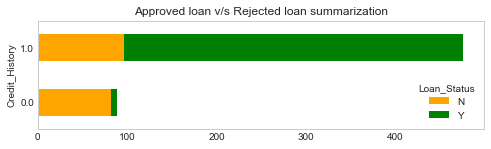

In [132]:
status = pd.crosstab(loan['Credit_History'], loan['Loan_Status'])
status.plot(kind='barh', stacked=True, color=['orange','green'],figsize=(8,2),grid=False)
plt.title("Approved loan v/s Rejected loan summarization")



In [133]:
loan['Credit_History'].fillna(loan['Credit_History'].mean(), inplace=True)
loan['Loan_Status'].fillna('NO',inplace=True)
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)

In [76]:
loan.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder
var = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
obj=LabelEncoder()
for i in var:
    loan[i] = obj.fit_transform(loan[i])
loan.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# Phase 1.1
   Preparation of Training sets and Testing sets

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(loan['Credit_History'],loan['Loan_Status'])

In [137]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(460,)
(460,)
(154,)
(154,)


In [138]:
myX=x_train.sort_values().to_frame()
myY=y_train.sort_values().to_frame()


# Phase 2

# Modelling for Prediction

# Logistic Regression
     
The logistic regression is a predictive analysis.  Logistic regression is used to describe data and to     explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. 

In [139]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(myX,myY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [140]:
predict=logreg.predict(x_train.to_frame())
predict.shape


(460,)

In [141]:
from sklearn import metrics

In [142]:
accuracy=metrics.accuracy_score(predict,y_train)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))


Accuracy : 80.652%


In [143]:
logreg.predict([[0.4874]])

array([0])

In [18]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


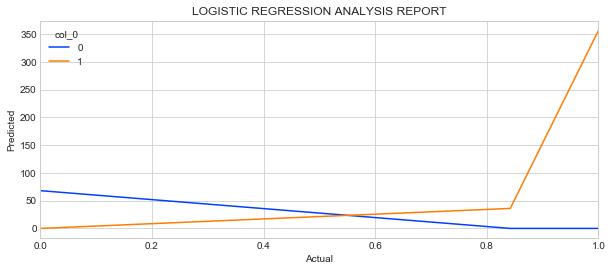

In [144]:
status = pd.crosstab(x_train, predict)
status.plot(color=sb.color_palette('bright',5),figsize=(10,4))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LOGISTIC REGRESSION ANALYSIS REPORT")
plt.show()


In [145]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_train,predict)))

0.43986163832455905


# Decision Tree

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [148]:
from sklearn import tree
DecTree=tree.DecisionTreeClassifier()
x1_train,y1_train,x1_test,y1_test=train_test_split(loan[['Credit_History','Gender','Married','Education']],loan['Loan_Status'])

(154, 4)

In [82]:
myX1=loan[['Credit_History','Gender','Married','Education']]
myY1=loan['Loan_Status'].to_frame()

In [83]:
DecTree=DecTree.fit(loan[['Credit_History','Gender','Married','Education']],myY1)

In [102]:
accuracy=metrics.accuracy_score(pred,y_train)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))


Accuracy : 77.609%


In [161]:
logreg.predict([[0.4874]])

array([0])